<a href="https://colab.research.google.com/github/AnnaPerfilyeva/VKR/blob/main/%D0%91%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82_%D0%92%D0%9A%D0%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD

Импорт данных

In [ ]:
X_bp = pd.read_excel('/content/X_bp.xlsx')
X_nup = pd.read_excel('/content/X_nup.xlsx')

In [ ]:
set = X_bp.merge(X_nup)
set.drop(["Unnamed: 0"], axis=1, inplace=True)
set.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


Разведочный анализ данных

In [ ]:
print(set.shape)

(1023, 13)


In [ ]:
set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [ ]:
set.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [ ]:
set.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,1023.0,2.930366,0.913222,0.389403,2.317887,2.906878,3.552660,5.591742
"Плотность, кг/м3",1023.0,1975.734888,73.729231,1731.764635,1924.155467,1977.621657,2021.374375,2207.773481
"модуль упругости, ГПа",1023.0,739.923233,330.231581,2.436909,500.047452,739.664328,961.812526,1911.536477
"Количество отвердителя, м.%",1023.0,110.570769,28.295911,17.740275,92.443497,110.564840,129.730366,198.953207
"Содержание эпоксидных групп,%_2",1023.0,22.244390,2.406301,14.254985,20.608034,22.230744,23.961934,33.000000
"Температура вспышки, С_2",1023.0,285.882151,40.943260,100.000000,259.066528,285.896812,313.002106,413.273418
"Поверхностная плотность, г/м2",1023.0,482.731833,281.314690,0.603740,266.816645,451.864365,693.225017,1399.542362
"Модуль упругости при растяжении, ГПа",1023.0,73.328571,3.118983,64.054061,71.245018,73.268805,75.356612,82.682051
"Прочность при растяжении, МПа",1023.0,2466.922843,485.628006,1036.856605,2135.850448,2459.524526,2767.193119,3848.436732
"Потребление смолы, г/м2",1023.0,218.423144,59.735931,33.803026,179.627520,219.198882,257.481724,414.590628


In [ ]:
corr = set.corr()
corr.style.background_gradient(cmap='RdYlGn')

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,0.003841,0.031700,-0.006445,0.019766,-0.004776,-0.006272,-0.008411,0.024148,0.072531,-0.031073,0.036437,-0.004652
"Плотность, кг/м3",0.003841,1.000000,-0.009647,-0.035911,-0.008278,-0.020695,0.044930,-0.017602,-0.069981,-0.015937,-0.068474,-0.061015,0.080304
"модуль упругости, ГПа",0.031700,-0.009647,1.000000,0.024049,-0.006804,0.031174,-0.005306,0.023267,0.041868,0.001840,-0.025417,-0.009875,0.056346
"Количество отвердителя, м.%",-0.006445,-0.035911,0.024049,1.000000,-0.000684,0.095193,0.055198,-0.065929,-0.075375,0.007446,0.038570,0.014887,0.017248
"Содержание эпоксидных групп,%_2",0.019766,-0.008278,-0.006804,-0.000684,1.000000,-0.009769,-0.012940,0.056828,-0.023899,0.015165,0.008052,0.003022,-0.039073
"Температура вспышки, С_2",-0.004776,-0.020695,0.031174,0.095193,-0.009769,1.000000,0.020121,0.028414,-0.031763,0.059954,0.020695,0.025795,0.011391
"Поверхностная плотность, г/м2",-0.006272,0.044930,-0.005306,0.055198,-0.012940,0.020121,1.000000,0.036702,-0.003210,0.015692,0.052299,0.038332,-0.049923
"Модуль упругости при растяжении, ГПа",-0.008411,-0.017602,0.023267,-0.065929,0.056828,0.028414,0.036702,1.000000,-0.009009,0.050938,0.023003,-0.029468,0.006476
"Прочность при растяжении, МПа",0.024148,-0.069981,0.041868,-0.075375,-0.023899,-0.031763,-0.003210,-0.009009,1.000000,0.028602,0.023398,-0.059547,0.019604
"Потребление смолы, г/м2",0.072531,-0.015937,0.001840,0.007446,0.015165,0.059954,0.015692,0.050938,0.028602,1.000000,-0.015334,0.013394,0.012239


In [ ]:
set.corr()['Модуль упругости при растяжении, ГПа'].sort_values()

Количество отвердителя, м.%            -0.065929
Шаг нашивки                            -0.029468
Плотность, кг/м3                       -0.017602
Прочность при растяжении, МПа          -0.009009
Соотношение матрица-наполнитель        -0.008411
Плотность нашивки                       0.006476
Угол нашивки, град                      0.023003
модуль упругости, ГПа                   0.023267
Температура вспышки, С_2                0.028414
Поверхностная плотность, г/м2           0.036702
Потребление смолы, г/м2                 0.050938
Содержание эпоксидных групп,%_2         0.056828
Модуль упругости при растяжении, ГПа    1.000000
Name: Модуль упругости при растяжении, ГПа, dtype: float64

In [ ]:
set.corr()['Прочность при растяжении, МПа'].sort_values()

Количество отвердителя, м.%            -0.075375
Плотность, кг/м3                       -0.069981
Шаг нашивки                            -0.059547
Температура вспышки, С_2               -0.031763
Содержание эпоксидных групп,%_2        -0.023899
Модуль упругости при растяжении, ГПа   -0.009009
Поверхностная плотность, г/м2          -0.003210
Плотность нашивки                       0.019604
Угол нашивки, град                      0.023398
Соотношение матрица-наполнитель         0.024148
Потребление смолы, г/м2                 0.028602
модуль упругости, ГПа                   0.041868
Прочность при растяжении, МПа           1.000000
Name: Прочность при растяжении, МПа, dtype: float64

In [ ]:
set.corr()['Соотношение матрица-наполнитель'].sort_values()

Угол нашивки, град                     -0.031073
Модуль упругости при растяжении, ГПа   -0.008411
Количество отвердителя, м.%            -0.006445
Поверхностная плотность, г/м2          -0.006272
Температура вспышки, С_2               -0.004776
Плотность нашивки                      -0.004652
Плотность, кг/м3                        0.003841
Содержание эпоксидных групп,%_2         0.019766
Прочность при растяжении, МПа           0.024148
модуль упругости, ГПа                   0.031700
Шаг нашивки                             0.036437
Потребление смолы, г/м2                 0.072531
Соотношение матрица-наполнитель         1.000000
Name: Соотношение матрица-наполнитель, dtype: float64

<Axes: >

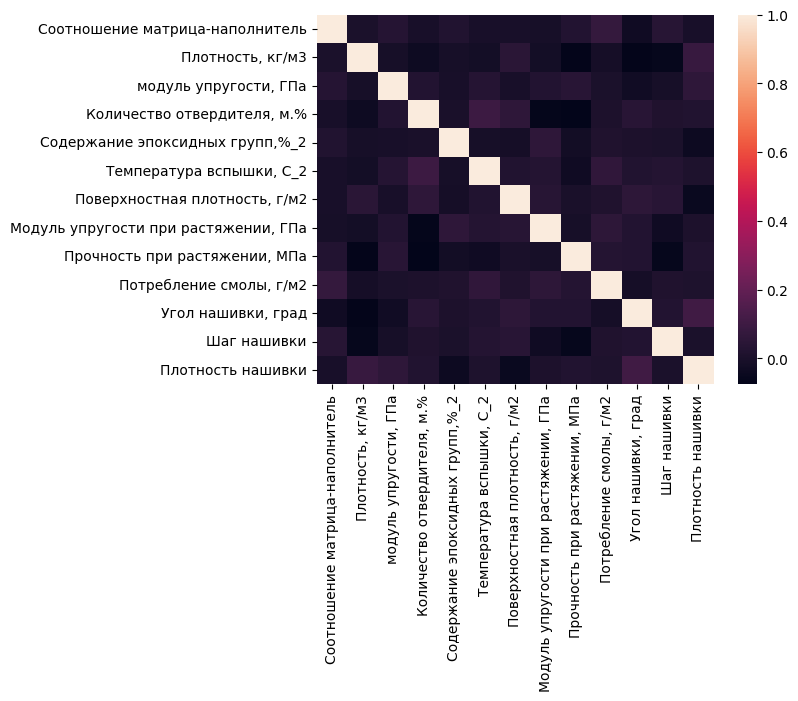

In [ ]:
sns.heatmap(set.corr())

Анализ на выбросы и аномалии

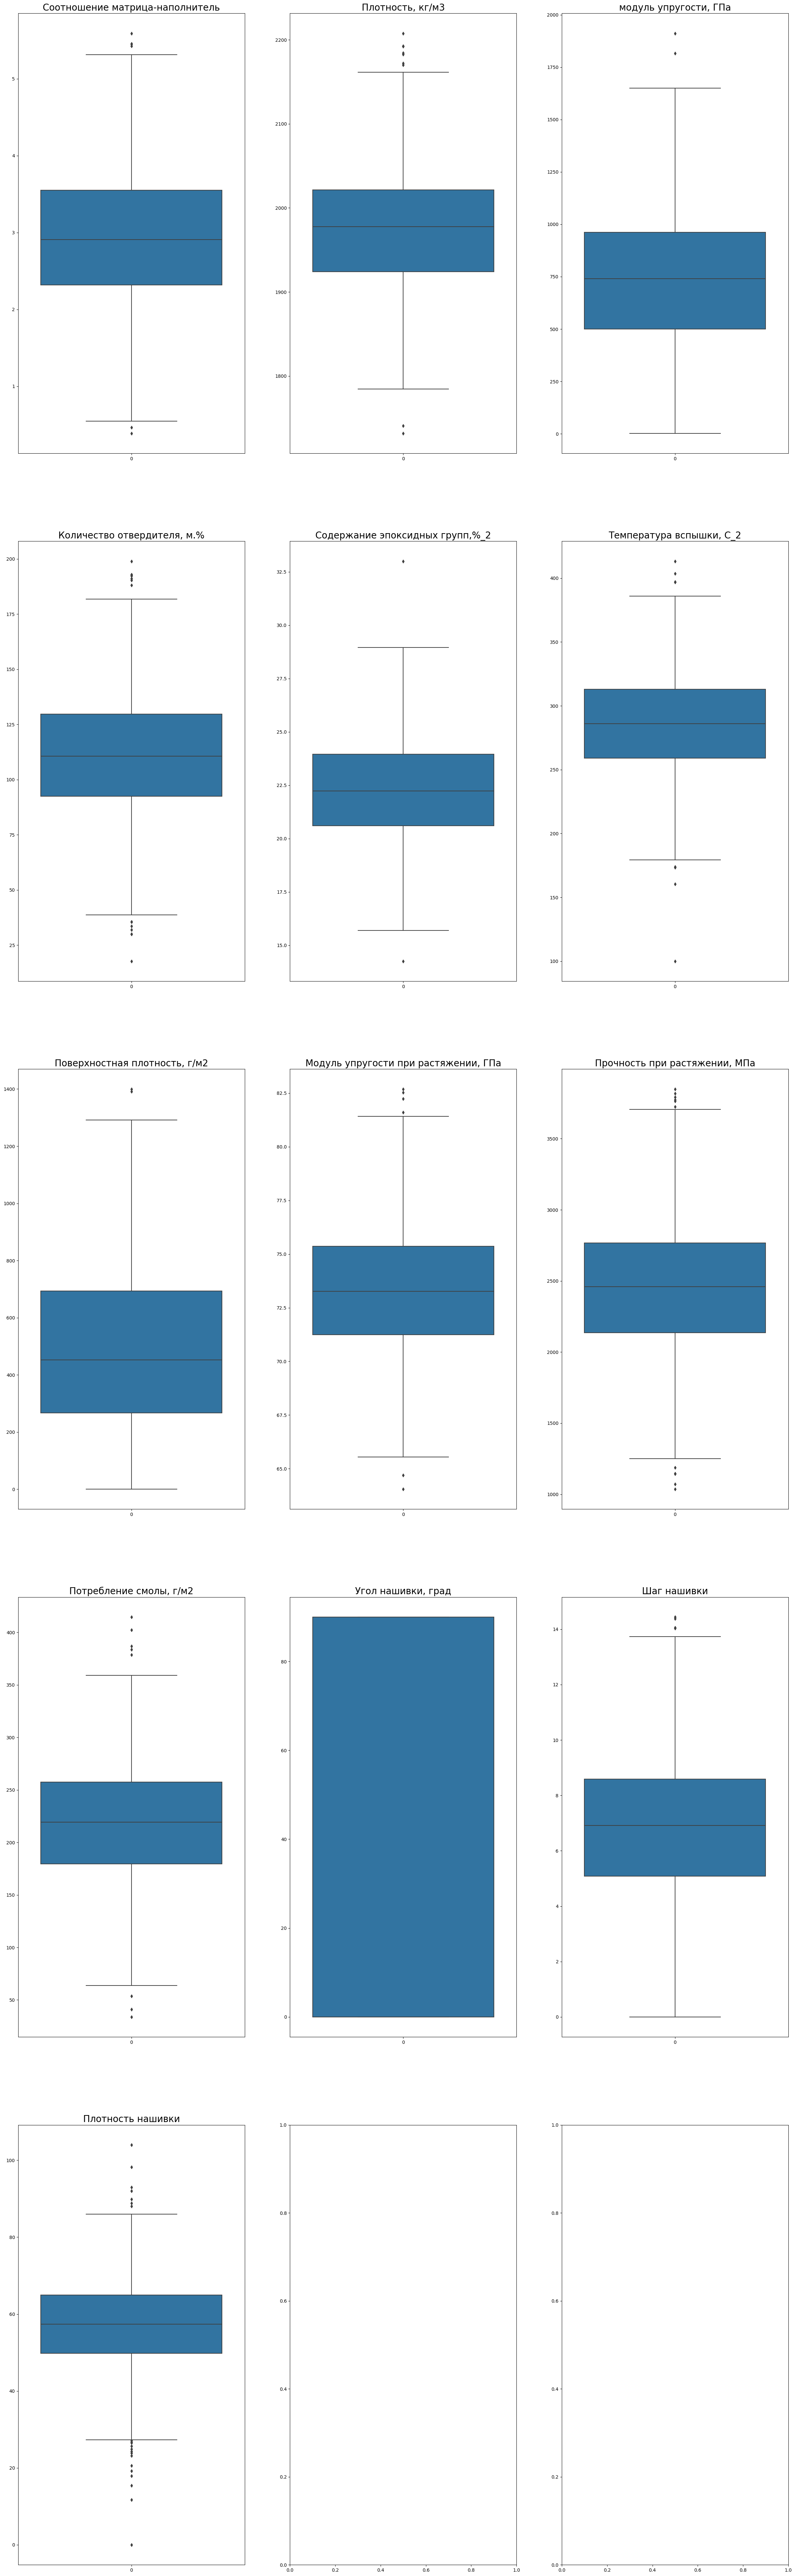

In [ ]:
columns = list(set)
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(30,100))
for index, column in enumerate(columns):
  i, j = divmod(index, 3)
  sns.boxplot(data=set[column], ax=axs[i,j]).set_title(column, fontsize=20)

Удаление выбросов методом IQR

In [ ]:
#Q1 = set.quantile(0.25)
#Q3 = set.quantile(0.75)
#IQR = Q3-Q1
#set = set[~((set<(Q1 - 1.5*IQR))|(set>(Q3 + 1.5*IQR))).any(axis=1)]

Распределение

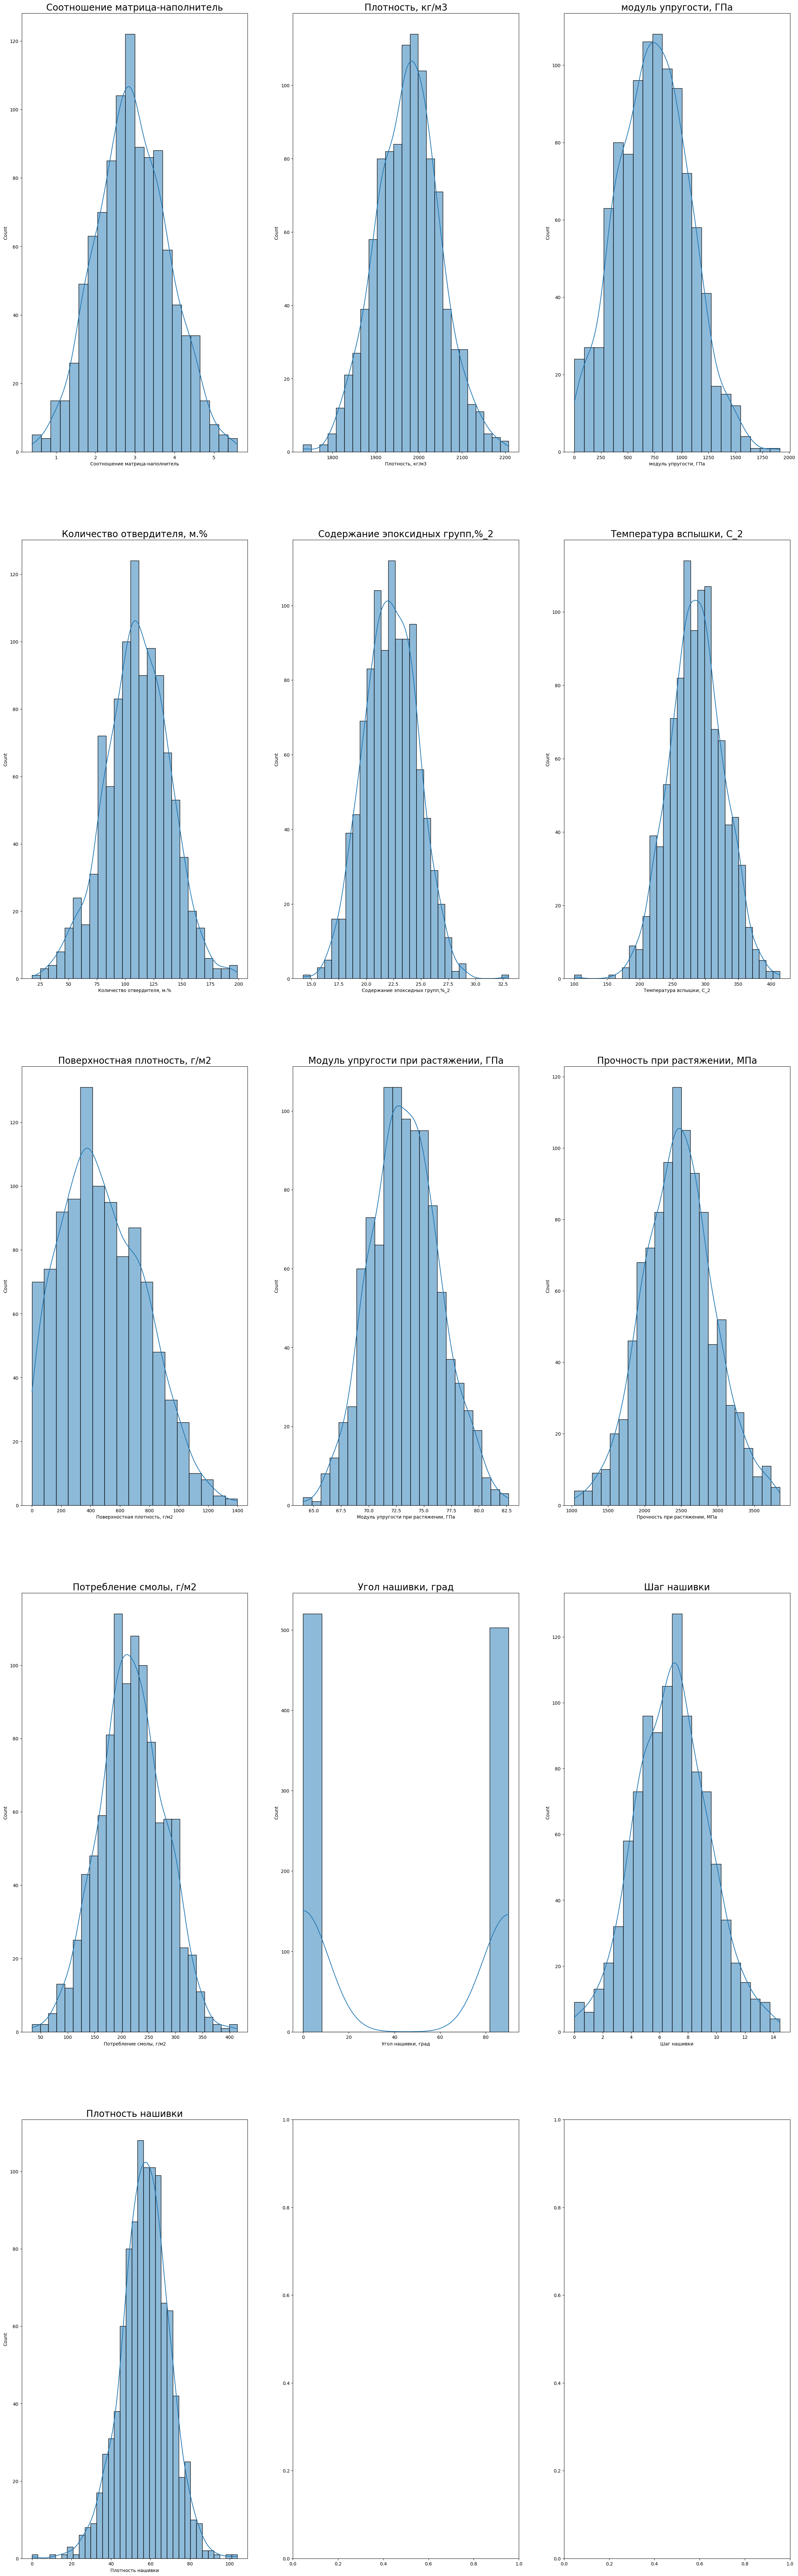

In [ ]:
columns = list(set)
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(30,100))
for index, column in enumerate(columns):
  i, j = divmod(index, 3)
  sns.histplot(data=set[column], ax=axs[i,j], kde=True).set_title(column, fontsize=20)

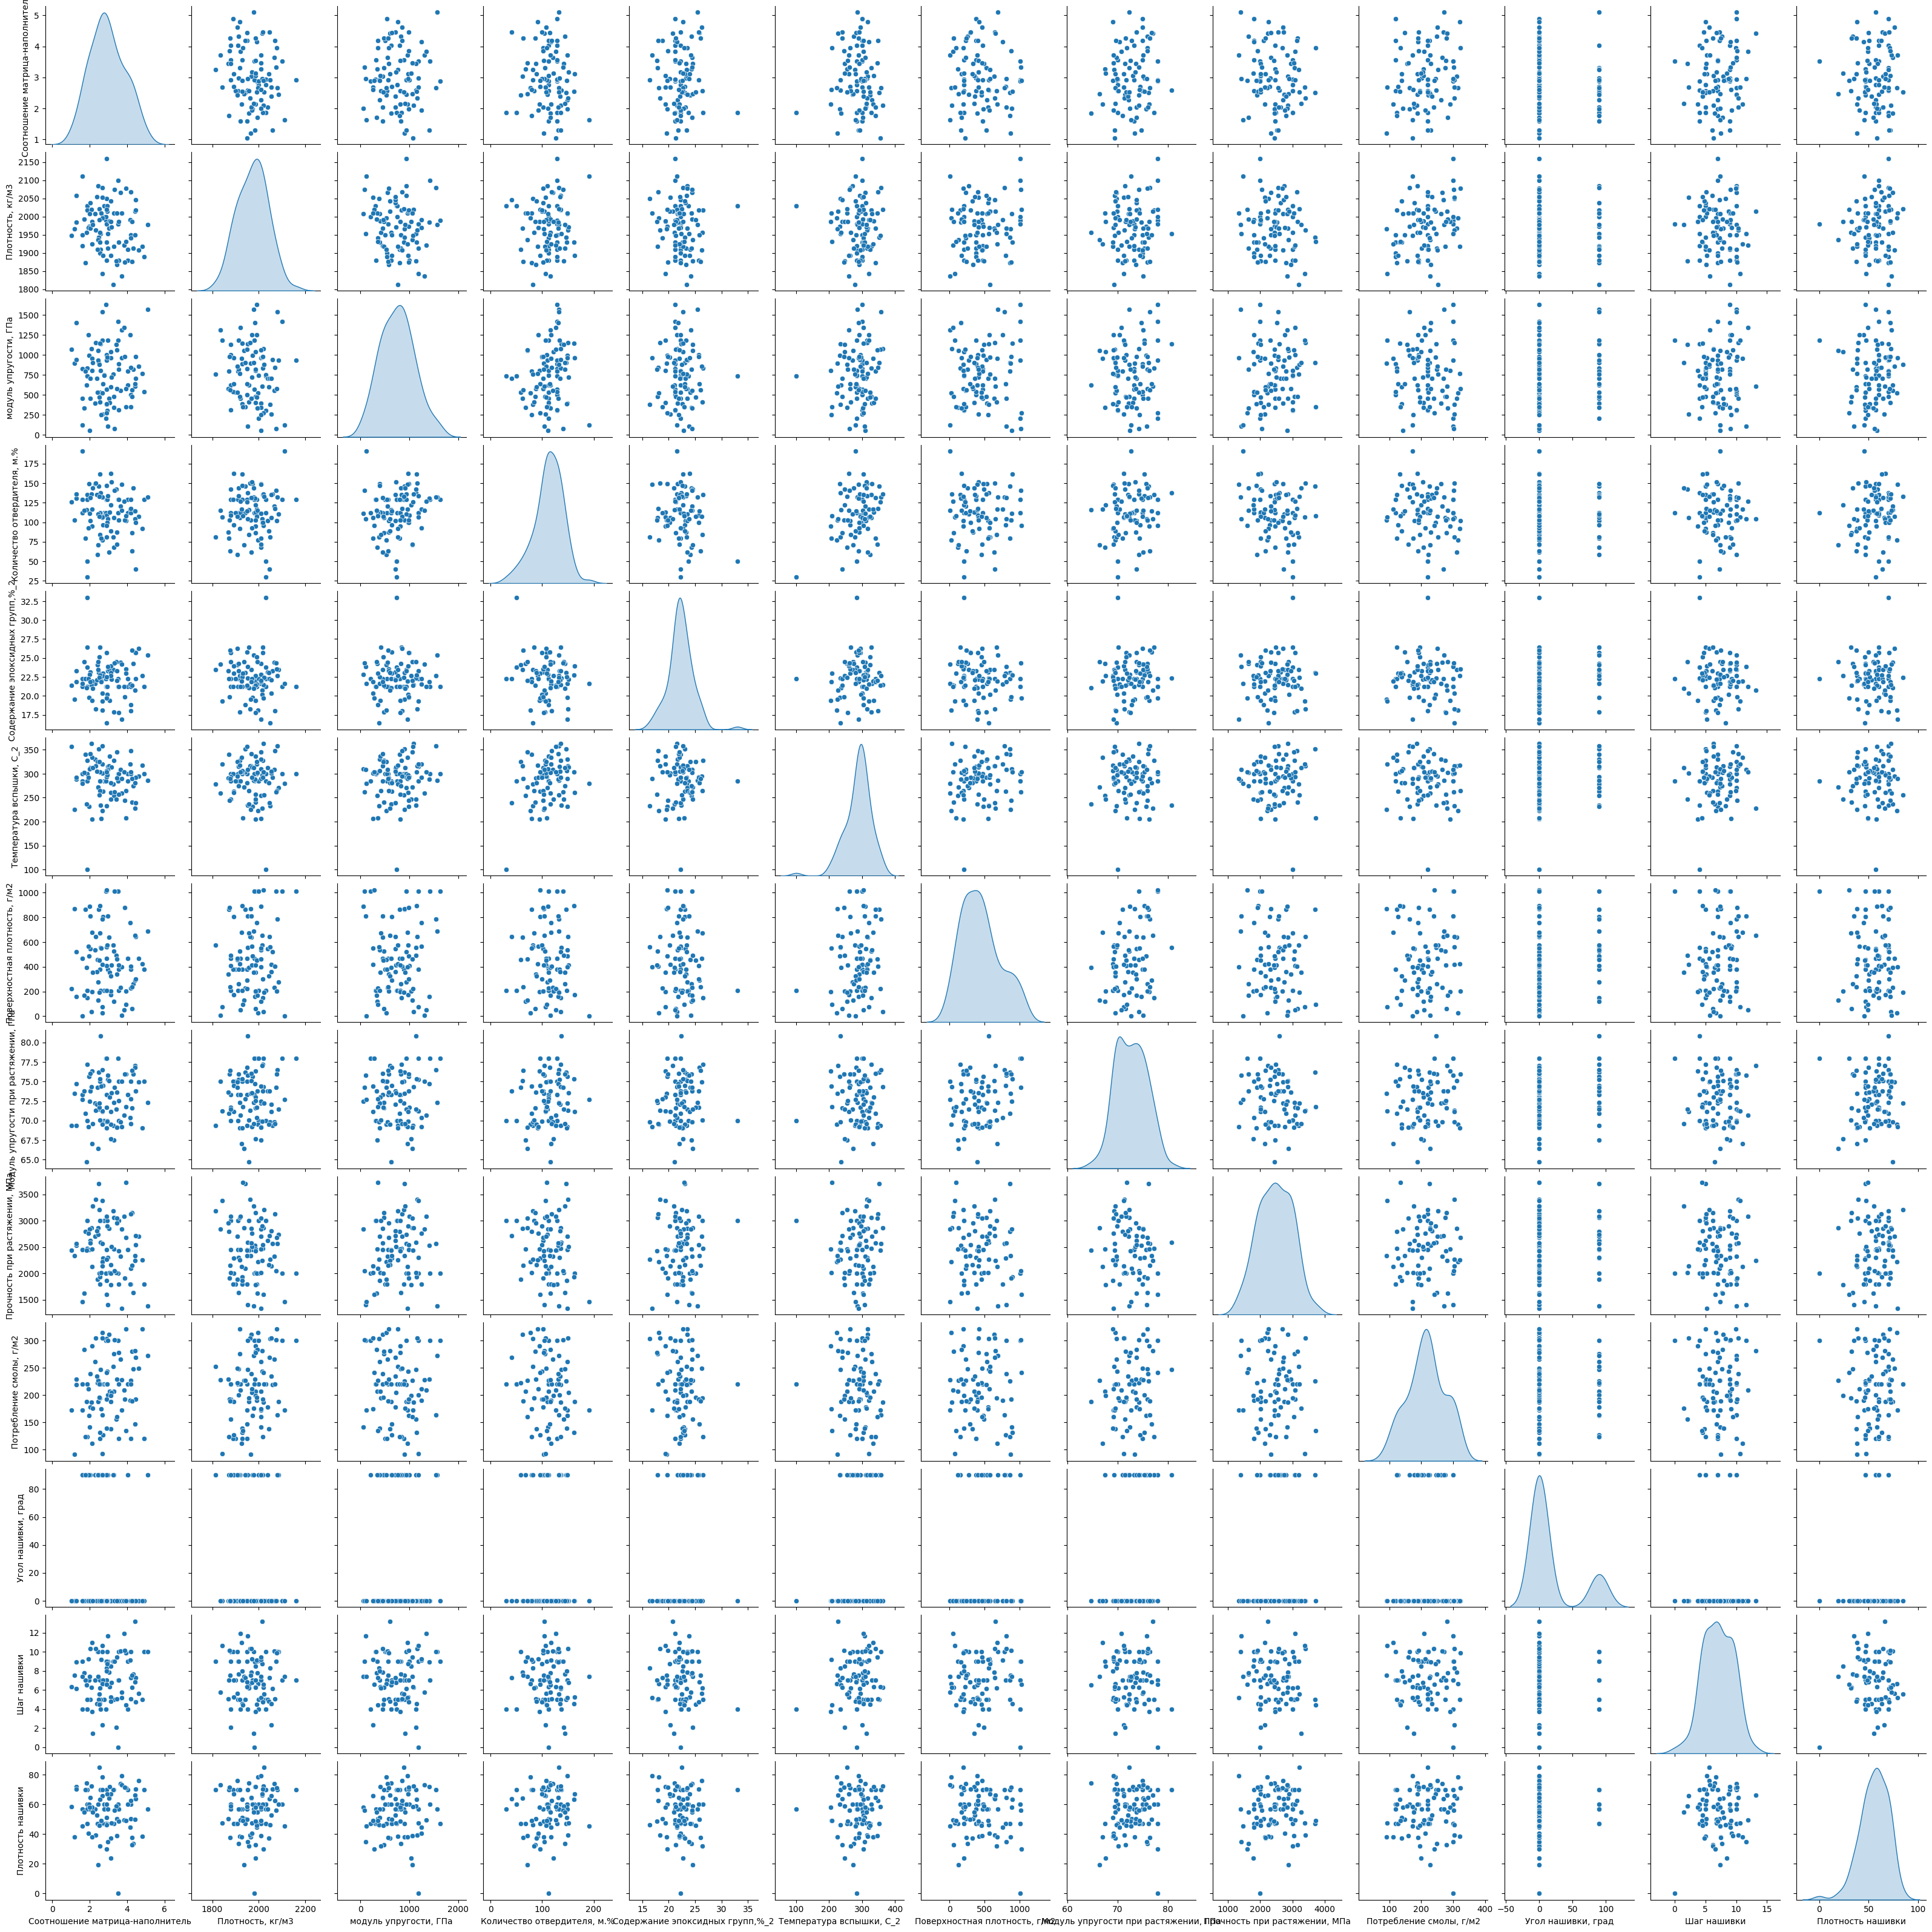

In [ ]:
sns.pairplot(set.head(100), diag_kind='kde')

In [ ]:
set.shape

(1023, 13)

Нормализация

In [ ]:
scaler = MinMaxScaler()
set_n = scaler.fit_transform(set)
set_n = pd.DataFrame(data = set_n, columns=['Соотношение матрица-наполнитель',
                                            'Плотность, кг/м3', 
                                            'модуль упругости, ГПа',
                                            'Количество отвердителя, м.%', 
                                            'Содержание эпоксидных групп,%_2', 
                                            'Температура вспышки, С_2', 
                                            'Поверхностная плотность, г/м2', 
                                            'Модуль упругости при растяжении, ГПа',
                                            'Прочность при растяжении, МПа',
                                            'Потребление смолы, г/м2', 
                                            'Угол нашивки, град', 
                                            'Шаг нашивки', 
                                            'Плотность нашивки',])
set_n.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.282131,0.626533,0.385679,0.067654,0.427467,0.000000,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.548135
1,0.282131,0.626533,0.385679,0.178021,0.506535,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.576985
2,0.282131,0.626533,0.385679,0.177469,1.000000,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.673149
3,0.282131,0.626533,0.385679,0.613972,0.373167,0.638420,0.149682,0.319194,0.698235,0.488979,0.0,0.346248,0.451971
4,0.457857,0.626533,0.393150,0.519387,0.427467,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.346248,0.548135


Выделение целевых переменных

In [ ]:
y1 = set_n['Модуль упругости при растяжении, ГПа']
y2 = set_n['Прочность при растяжении, МПа']
y3 = set_n['Соотношение матрица-наполнитель']

X1 = set_n.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа', 'Соотношение матрица-наполнитель'], axis=1)
X2 = set_n.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа', 'Соотношение матрица-наполнитель'], axis=1)
X3 = set_n.drop(['Соотношение матрица-наполнитель'], axis=1)
print(y1.shape)
print(y2.shape)
print(y3.shape)
print(X1.shape)
print(X2.shape)
print(X3.shape)

(1023,)
(1023,)
(1023,)
(1023, 10)
(1023, 10)
(1023, 12)


<Axes: xlabel='модуль упругости, ГПа', ylabel='Count'>

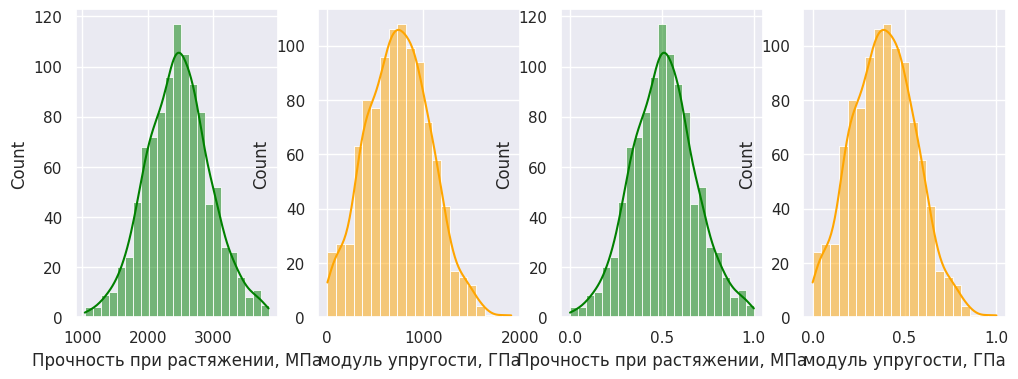

In [ ]:
sns.set(style='darkgrid')
fig, axs = plt.subplots(1, 4, figsize=(12,4))

sns.histplot(data=set, x='Прочность при растяжении, МПа', kde=True, ax=axs[0], color='green')
sns.histplot(data=set, x='модуль упругости, ГПа', kde=True, ax=axs[1], color='orange')

sns.histplot(data=set_n, x='Прочность при растяжении, МПа', kde=True, ax=axs[2], color='green')
sns.histplot(data=set_n, x='модуль упругости, ГПа', kde=True, ax=axs[3], color='orange')

Разделение на тренировочные и тестовые выборки

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, shuffle=True, random_state=25)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, shuffle=True, random_state=25)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, shuffle=True, random_state=25)

Построение регрессионных моделей для свойства: "Модуль упругости при растяжении, ГПа"

Линейная регрессия

In [ ]:
ln_model = LinearRegression()
ln_model.fit(X1_train, y1_train)

y1_pred_ln = ln_model.predict(X1_test)
m1_ln = (mean_absolute_error(y1_test, y1_pred_ln) / y1_test.mean()) * 100

print('MAE:', mean_absolute_error(y1_test, y1_pred_ln))
print('MAE/test_mean*100:', m1_ln)
print('Точность модели:', 100-m1_ln)
print('MSE:', mean_squared_error(y1_test, y1_pred_ln))
print('r2:', r2_score(y1_test, y1_pred_ln))

MAE: 0.1308707455060382
MAE/test_mean*100: 25.828271025781156
Точность модели: 74.17172897421884
MSE: 0.026527843608904
r2: -0.04056882222435165


Случайный лес c GridSearch

In [ ]:
parameters_rf = {'n_estimators':[50, 100, 150], 
                 'max_depth': [2, 3], 
                 'criterion': ['squared_error', 'absolute_error', 'poisson']}

In [ ]:
rf_model = RandomForestRegressor()

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=parameters_rf, cv=10)
grid_search_rf.fit(X1_train, y1_train)
best_rf_model = grid_search_rf.best_estimator_

grid_search_rf.best_params_

{'criterion': 'squared_error', 'max_depth': 2, 'n_estimators': 150}

In [ ]:
y1_pred_rf = best_rf_model.predict(X1_test)
m1_rf = (mean_absolute_error(y1_test, y1_pred_rf) / y1_test.mean()) * 100
print('MAE:', mean_absolute_error(y1_test, y1_pred_rf))
print('MAE/test_mean*100:', m1_rf)
print('Точность модели:', 100-m1_rf)
print('MSE:', mean_squared_error(y1_test, y1_pred_rf))
print('r2:', r2_score(y1_test, y1_pred_rf))

MAE: 0.12802153671412467
MAE/test_mean*100: 25.265959436571283
Точность модели: 74.73404056342872
MSE: 0.02599724451453331
r2: -0.019755789591827444


Дерево решений c Random Search

In [ ]:
parameters_tree = {'splitter':['best', 'random'], 
                 'max_depth': [2, 4, 5], 
                 'criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse']}

In [ ]:
tree_model = DecisionTreeRegressor()
rs_tree = RandomizedSearchCV(estimator=tree_model, param_distributions=parameters_tree, n_iter=10, cv=10)
rs_tree.fit(X1_train, y1_train)
best_tree_model = rs_tree.best_estimator_

rs_tree.best_params_

{'splitter': 'random', 'max_depth': 2, 'criterion': 'friedman_mse'}

In [ ]:
y1_pred_tree = best_tree_model.predict(X1_test)
m1_tree = (mean_absolute_error(y1_test, y1_pred_tree) / y1_test.mean()) * 100
print('MAE:', mean_absolute_error(y1_test, y1_pred_tree))
print('MAE/test_mean*100:', m1_tree)
print('Точность модели:', 100-m1_tree)
print('MSE:', mean_squared_error(y1_test, y1_pred_tree))
print('r2:', r2_score(y1_test, y1_pred_tree))

MAE: 0.12823761839377934
MAE/test_mean*100: 25.308604690590787
Точность модели: 74.69139530940922
MSE: 0.025969382579802188
r2: -0.0186628903333923


SVR (Support Vector Regression)

In [ ]:
svr_model = svm.SVR()
svr_model.fit(X1_train, y1_train)
y1_pred_svr = svr_model.predict(X1_test)
m1_svr = (mean_absolute_error(y1_test, y1_pred_svr) / y1_test.mean()) * 100
print('MAE:', mean_absolute_error(y1_test, y1_pred_svr))
print('MAE/test_mean*100:', m1_svr)
print('Точность модели:', 100-m1_svr)
print('MSE:', mean_squared_error(y1_test, y1_pred_svr))
print('r2:', r2_score(y1_test, y1_pred_svr))

MAE: 0.13983976598165576
MAE/test_mean*100: 27.598370911621135
Точность модели: 72.40162908837887
MSE: 0.030164568157917043
r2: -0.18322128340859622


KNN

In [ ]:
knn_model = KNeighborsRegressor()
knn_model.fit(X1_train, y1_train)
y1_pred_knn = knn_model.predict(X1_test)
m1_knn = (mean_absolute_error(y1_test, y1_pred_knn) / y1_test.mean()) * 100
print('MAE:', mean_absolute_error(y1_test, y1_pred_knn))
print('MAE/test_mean*100:', m1_knn)
print('Точность модели:', 100-m1_knn)
print('MSE:', mean_squared_error(y1_test, y1_pred_knn))
print('r2:', r2_score(y1_test, y1_pred_knn))

MAE: 0.1405764984856351
MAE/test_mean*100: 27.743770303308736
Точность модели: 72.25622969669126
MSE: 0.031439562049305335
r2: -0.23323359920270215


LASSO

In [ ]:
lasso_model = LassoCV()
lasso_model.fit(X1_train, y1_train)
y1_pred_lasso = lasso_model.predict(X1_test)
m1_lasso = (mean_absolute_error(y1_test, y1_pred_lasso) / y1_test.mean()) * 100
print('MAE:', mean_absolute_error(y1_test, y1_pred_lasso))
print('MAE/test_mean*100:', m1_lasso)
print('Точность модели:', 100-m1_lasso)
print('MSE:', mean_squared_error(y1_test, y1_pred_lasso))
print('r2:', r2_score(y1_test, y1_pred_lasso))

MAE: 0.1267344794207639
MAE/test_mean*100: 25.011949539477087
Точность модели: 74.98805046052291
MSE: 0.0256151399485359
r2: -0.004767534079305635


Построение регрессионных моделей для свойства: "Прочность при растяжении, МПа"

Линейная регрессия

In [ ]:
ln2_model = LinearRegression()
ln2_model.fit(X2_train, y2_train)
y2_pred_ln2 = ln2_model.predict(X2_test)
m1_ln2 = (mean_absolute_error(y2_test, y2_pred_ln2) / y2_test.mean()) * 100

print('MAE:', mean_absolute_error(y2_test, y2_pred_ln2))
print('MAE/test_mean*100:', m1_ln2)
print('Точность модели:', 100-m1_ln2)
print('MSE:', mean_squared_error(y2_test, y2_pred_ln2))
print('r2:', r2_score(y2_test, y2_pred_ln2))

MAE: 0.15129965419966962
MAE/test_mean*100: 28.743521181094373
Точность модели: 71.25647881890563
MSE: 0.03600814215102692
r2: -0.018000706435513658


Случайный лес c GridSearch

In [ ]:
parameters_rf2 = {'n_estimators':[30, 50, 100], 
                 'max_depth': [2, 3, 4], 
                 'criterion': ['squared_error', 'absolute_error', 'poisson']}
rf2_model = RandomForestRegressor()

grid_search_rf2 = GridSearchCV(estimator=rf2_model, param_grid=parameters_rf2, cv=10)
grid_search_rf2.fit(X2_train, y2_train)
best_rf2_model = grid_search_rf2.best_estimator_

grid_search_rf2.best_params_

{'criterion': 'squared_error', 'max_depth': 3, 'n_estimators': 50}

In [ ]:
y2_pred_rf2 = best_rf2_model.predict(X2_test)
m1_rf2 = (mean_absolute_error(y2_test, y2_pred_rf2) / y2_test.mean()) * 100
print('MAE:', mean_absolute_error(y2_test, y2_pred_rf2))
print('MAE/test_mean*100:', m1_rf2)
print('Точность модели:', 100-m1_rf2)
print('MSE:', mean_squared_error(y2_test, y2_pred_rf2))
print('r2:', r2_score(y2_test, y2_pred_rf2))

MAE: 0.15272759622969503
MAE/test_mean*100: 29.014797954346243
Точность модели: 70.98520204565375
MSE: 0.03676264764163155
r2: -0.039331635402174436


Дерево решений c Random Search

In [ ]:
parameters_tree2 = {'splitter':['best', 'random'], 
                 'max_depth': [2, 4, 3, 5], 
                 'criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse']}
tree2_model = DecisionTreeRegressor()
rs_tree2 = RandomizedSearchCV(estimator=tree2_model, param_distributions=parameters_tree2, n_iter=10, cv=10)
rs_tree2.fit(X2_train, y2_train)
best_tree2_model = rs_tree2.best_estimator_

rs_tree2.best_params_

{'splitter': 'random', 'max_depth': 2, 'criterion': 'squared_error'}

In [ ]:
y2_pred_tree2 = best_tree2_model.predict(X2_test)
m1_tree2 = (mean_absolute_error(y2_test, y2_pred_tree2) / y2_test.mean()) * 100
print('MAE:', mean_absolute_error(y2_test, y2_pred_tree2))
print('MAE/test_mean*100:', m1_tree2)
print('Точность модели:', 100-m1_tree2)
print('MSE:', mean_squared_error(y2_test, y2_pred_tree2))
print('r2:', r2_score(y2_test, y2_pred_tree2))

MAE: 0.1528716422682118
MAE/test_mean*100: 29.042163452179402
Точность модели: 70.95783654782059
MSE: 0.03671217959949784
r2: -0.037904833032614604


SVR (Support Vector Regression)

In [ ]:
svr2_model = svm.SVR()
svr2_model.fit(X2_train, y2_train)
y2_pred_svr2 = svr2_model.predict(X2_test)
m1_svr2 = (mean_absolute_error(y2_test, y2_pred_svr2) / y2_test.mean()) * 100
print('MAE:', mean_absolute_error(y2_test, y2_pred_svr2))
print('MAE/test_mean*100:', m1_svr2)
print('Точность модели:', 100-m1_svr2)
print('MSE:', mean_squared_error(y2_test, y2_pred_svr2))
print('r2:', r2_score(y2_test, y2_pred_svr2))

MAE: 0.15559055795096585
MAE/test_mean*100: 29.558696096819265
Точность модели: 70.44130390318074
MSE: 0.03864111309498767
r2: -0.09243848969392543


KNN

In [ ]:
knn2_model = KNeighborsRegressor()
knn2_model.fit(X2_train, y2_train)
y2_pred_knn2 = knn2_model.predict(X2_test)
m1_knn2 = (mean_absolute_error(y2_test, y2_pred_knn2) / y2_test.mean()) * 100
print('MAE:', mean_absolute_error(y2_test, y2_pred_knn2))
print('MAE/test_mean*100:', m1_knn2)
print('Точность модели:', 100-m1_knn2)
print('MSE:', mean_squared_error(y2_test, y2_pred_knn2))
print('r2:', r2_score(y2_test, y2_pred_knn2))

MAE: 0.16654765264171217
MAE/test_mean*100: 31.640296910731834
Точность модели: 68.35970308926817
MSE: 0.04348321059433061
r2: -0.22933138059305125


In [ ]:
lasso2_model = LassoCV()
lasso2_model.fit(X2_train, y2_train)
y2_pred_lasso2 = lasso2_model.predict(X2_test)
m1_lasso2 = (mean_absolute_error(y2_test, y2_pred_lasso2) / y2_test.mean()) * 100
print('MAE:', mean_absolute_error(y2_test, y2_pred_lasso2))
print('MAE/test_mean*100:', m1_lasso2)
print('Точность модели:', 100-m1_lasso2)
print('MSE:', mean_squared_error(y2_test, y2_pred_lasso2))
print('r2:', r2_score(y2_test, y2_pred_lasso2))

MAE: 0.15093964773070728
MAE/test_mean*100: 28.675128073253596
Точность модели: 71.3248719267464
MSE: 0.035908527221896025
r2: -0.015184452605992327


Сравнение результатов моделей

In [ ]:
accuracy1 = pd.DataFrame({'Свойство': ['Модуль упругости при растяжении, ГПа',
                                       'Модуль упругости при растяжении, ГПа',
                                       'Модуль упругости при растяжении, ГПа',
                                       'Модуль упругости при растяжении, ГПа',
                                       'Модуль упругости при растяжении, ГПа',
                                       'Модуль упругости при растяжении, ГПа',
                                       'Прочность при растяжении, МПа',
                                       'Прочность при растяжении, МПа',
                                       'Прочность при растяжении, МПа',
                                       'Прочность при растяжении, МПа',
                                       'Прочность при растяжении, МПа',
                                       'Прочность при растяжении, МПа'],
                          'Модель': ['Линейная регрессия', 
                                    'Случайный лес', 
                                    'Дерево решений',
                                    'SVR',
                                    'KNN',
                                    'LASSO',
                                     'Линейная регрессия', 
                                    'Случайный лес', 
                                    'Дерево решений',
                                    'SVR',
                                    'KNN',
                                     'LASSO'],
                         'MAE': [mean_absolute_error(y1_test, y1_pred_ln),
                                 mean_absolute_error(y1_test, y1_pred_rf),
                                 mean_absolute_error(y1_test, y1_pred_tree),
                                 mean_absolute_error(y1_test, y1_pred_svr),
                                 mean_absolute_error(y1_test, y1_pred_knn),
                                 mean_absolute_error(y1_test, y1_pred_lasso),
                                 mean_absolute_error(y2_test, y2_pred_ln2),
                                 mean_absolute_error(y2_test, y2_pred_rf2),
                                 mean_absolute_error(y2_test, y2_pred_tree2),
                                 mean_absolute_error(y2_test, y2_pred_svr2),
                                 mean_absolute_error(y2_test, y2_pred_knn2),
                                 mean_absolute_error(y2_test, y2_pred_lasso2)],
                         'MSE': [mean_squared_error(y1_test, y1_pred_ln),
                                 mean_squared_error(y1_test, y1_pred_rf),
                                 mean_squared_error(y1_test, y1_pred_tree),
                                 mean_squared_error(y1_test, y1_pred_svr),
                                 mean_squared_error(y1_test, y1_pred_knn),
                                 mean_squared_error(y1_test, y1_pred_lasso),
                                 mean_squared_error(y2_test, y2_pred_ln2),
                                 mean_squared_error(y2_test, y2_pred_rf2),
                                 mean_squared_error(y2_test, y2_pred_tree2),
                                 mean_squared_error(y2_test, y2_pred_svr2),
                                 mean_squared_error(y2_test, y2_pred_knn2),
                                 mean_squared_error(y2_test, y2_pred_lasso2)],
                         'r2': [r2_score(y1_test, y1_pred_ln),
                                r2_score(y1_test, y1_pred_rf),
                                r2_score(y1_test, y1_pred_tree),
                                r2_score(y1_test, y1_pred_svr),
                                r2_score(y1_test, y1_pred_knn),
                                r2_score(y1_test, y1_pred_lasso),
                                r2_score(y2_test, y2_pred_ln2),
                                r2_score(y2_test, y2_pred_rf2),
                                r2_score(y2_test, y2_pred_tree2),
                                r2_score(y2_test, y2_pred_svr2),
                                r2_score(y2_test, y2_pred_knn2),
                                r2_score(y2_test, y2_pred_lasso2)],
                         'Точность модели': [100-m1_ln,
                                             100-m1_rf,
                                             100-m1_tree,
                                             100-m1_svr,
                                             100-m1_knn,
                                             100-m1_lasso,
                                             100-m1_ln2,
                                             100-m1_rf2,
                                             100-m1_tree2,
                                             100-m1_svr2,
                                             100-m1_knn2,
                                             100-m1_lasso2]})
accuracy1

,Свойство,Модель,MAE,MSE,r2,Точность модели
0,"Модуль упругости при растяжении, ГПа",Линейная регрессия,0.130871,0.026528,-0.040569,74.171729
1,"Модуль упругости при растяжении, ГПа",Случайный лес,0.128022,0.025997,-0.019756,74.734041
2,"Модуль упругости при растяжении, ГПа",Дерево решений,0.128238,0.025969,-0.018663,74.691395
3,"Модуль упругости при растяжении, ГПа",SVR,0.139840,0.030165,-0.183221,72.401629
4,"Модуль упругости при растяжении, ГПа",KNN,0.140576,0.031440,-0.233234,72.256230
5,"Модуль упругости при растяжении, ГПа",LASSO,0.126734,0.025615,-0.004768,74.988050
6,"Прочность при растяжении, МПа",Линейная регрессия,0.151300,0.036008,-0.018001,71.256479
7,"Прочность при растяжении, МПа",Случайный лес,0.152728,0.036763,-0.039332,70.985202
8,"Прочность при растяжении, МПа",Дерево решений,0.152872,0.036712,-0.037905,70.957837
9,"Прочность при растяжении, МПа",SVR,0.155591,0.038641,-0.092438,70.441304


In [ ]:
n_features = X1.shape[1]
nsr1_model = Sequential()
nsr1_model.add(Dense(8, input_shape = (n_features, ), activation='softmax'))
nsr1_model.add(Dense(8, activation='softmax'))
nsr1_model.add(Dropout(0.3))
nsr1_model.add(Dense(1, activation='linear'))
nsr1_model.compile(optimizer='sgd', loss='mean_squared_error')
nsr1_model.fit(X1_train, y1_train, epochs=500, verbose=0, validation_split=0.3)
y1_pred_nsr1 = nsr1_model.predict(X1_test)
m1_nsr1 = (mean_absolute_error(y1_test, y1_pred_nsr1) / y1_test.mean()) * 100
print('Точность модели:', 100-m1_nsr1)
print('MSE:', mean_squared_error(y1_test, y1_pred_nsr1))
print('r2:', r2_score(y1_test, y1_pred_nsr1))

7/7 [==============================] - 0s 3ms/step
Точность модели: 74.99902086515897
MSE: 0.02560577979609346
r2: -0.004400377104677


Построение НС для прогнозирования свойства "Соотношение матрица-наполнитель"

In [ ]:
n_features = X3.shape[1]
ns_model = Sequential()
ns_model.add(Dense(8, input_shape = (n_features, ), activation='softmax'))
ns_model.add(Dropout(0.2))
ns_model.add(Dense(1, activation='linear'))
ns_model.compile(optimizer='sgd', loss='mean_squared_error')
ns_model.fit(X3_train, y3_train, epochs=500, verbose=0, validation_split=0.2)
y3_pred_ns = ns_model.predict(X3_test)
m1_ns = (mean_absolute_error(y3_test, y3_pred_ns) / y3_test.mean()) * 100
print('Точность модели:', 100-m1_ns)
print('MSE:', mean_squared_error(y3_test, y3_pred_ns))
print('r2:', r2_score(y3_test, y3_pred_ns))

7/7 [==============================] - 0s 3ms/step
Точность модели: 70.5933666215522
MSE: 0.03288325925862269
r2: 0.00031843412978049823


In [ ]:
n_features = X3.shape[1]
ns1_model = Sequential()
ns1_model.add(Dense(8, input_shape = (n_features, ), activation='softmax'))
ns1_model.add(Dense(8, activation='softmax'))
ns1_model.add(Dropout(0.3))
ns1_model.add(Dense(1, activation='linear'))
ns1_model.compile(optimizer='sgd', loss='mean_squared_error')
ns1_model.fit(X3_train, y3_train, epochs=500, verbose=0, validation_split=0.2)
y3_pred_ns1 = ns1_model.predict(X3_test)
m1_ns1 = (mean_absolute_error(y3_test, y3_pred_ns1) / y3_test.mean()) * 100
print('Точность модели:', 100-m1_ns1)
print('MSE:', mean_squared_error(y3_test, y3_pred_ns1))
print('r2:', r2_score(y3_test, y3_pred_ns1))

7/7 [==============================] - 0s 2ms/step
Точность модели: 70.62920108034116
MSE: 0.03287031422607073
r2: 0.000711975120045838


In [ ]:
y = set['Соотношение матрица-наполнитель']
X = set.drop(['Соотношение матрица-наполнитель'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=25)

In [ ]:
n_features = X.shape[1]
ns2_model = Sequential()
ns2_model.add(Dense(8, input_shape = (n_features, ), activation='softmax'))
ns2_model.add(Dropout(0.2))
ns2_model.add(Dense(1, activation='linear'))
ns2_model.compile(optimizer='sgd', loss='mean_squared_error')
ns2_model.fit(X_train, y_train, epochs=500, verbose=0, validation_split=0.2)
y_pred_ns2 = ns2_model.predict(X_test)
m1_ns2 = (mean_absolute_error(y_test, y_pred_ns2) / y_test.mean()) * 100
print('Точность модели:', 100-m1_ns2)
print('MSE:', mean_squared_error(y_test, y_pred_ns2))
print('r2:', r2_score(y_test, y_pred_ns2))

7/7 [==============================] - 0s 3ms/step
Точность модели: 74.45767845651946
MSE: 0.8904709139395217
r2: -0.0002516334455262559


In [ ]:
import flask
from flask import Flask, render_template, request

In [ ]:
pickle.dump(ns2_model, open('ns_model.pkl', 'wb'))

In [ ]:
model_load = pickle.load(open('ns_model.pkl', 'rb'))

In [ ]:
print(y_pred_ns2[:1])

[[2.9504132]]
